# Olympics Dataset Exploration (1896-2022)
#### by Matthew Martin (ISDA 111)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## "Results" dataset cleaning

In [249]:
df = pd.read_csv('olympic_results.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   discipline_title       162804 non-null  object
 1   event_title            162804 non-null  object
 2   slug_game              162804 non-null  object
 3   participant_type       162804 non-null  object
 4   medal_type             20206 non-null   object
 5   athletes               7976 non-null    object
 6   rank_equal             32526 non-null   object
 7   rank_position          158926 non-null  object
 8   country_name           162804 non-null  object
 9   country_code           157768 non-null  object
 10  country_3_letter_code  162804 non-null  object
 11  athlete_url            129991 non-null  object
 12  athlete_full_name      141646 non-null  object
 13  value_unit             78646 non-null   object
 14  value_type             90049 non-null   object
dtype

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


Creating a "year" column

In [4]:
# Creating an isolated "year" column
print(df['slug_game'].unique())
print(len(df['slug_game'].unique()))

df['year'] = df['slug_game'].str.split('-').str[-1].astype(int)
df.head(1)

['beijing-2022' 'tokyo-2020' 'pyeongchang-2018' 'rio-2016' 'sochi-2014'
 'london-2012' 'vancouver-2010' 'beijing-2008' 'turin-2006' 'athens-2004'
 'salt-lake-city-2002' 'sydney-2000' 'nagano-1998' 'atlanta-1996'
 'lillehammer-1994' 'barcelona-1992' 'albertville-1992' 'seoul-1988'
 'calgary-1988' 'los-angeles-1984' 'sarajevo-1984' 'moscow-1980'
 'lake-placid-1980' 'montreal-1976' 'innsbruck-1976' 'munich-1972'
 'sapporo-1972' 'mexico-city-1968' 'grenoble-1968' 'tokyo-1964'
 'innsbruck-1964' 'rome-1960' 'squaw-valley-1960' 'melbourne-1956'
 'cortina-d-ampezzo-1956' 'helsinki-1952' 'oslo-1952' 'london-1948'
 'st-moritz-1948' 'berlin-1936' 'garmisch-partenkirchen-1936'
 'los-angeles-1932' 'lake-placid-1932' 'amsterdam-1928' 'st-moritz-1928'
 'paris-1924' 'chamonix-1924' 'antwerp-1920' 'stockholm-1912'
 'london-1908' 'st-louis-1904' 'paris-1900' 'athens-1896']
53


,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,year
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN,2022


There have been 53 unique Olympic games since 1896.

#### Countries

In [253]:
# Countries
unique_countries = df['country_name'].unique()
print(unique_countries)
print('Unique Countries: ', len(unique_countries))

['Italy' 'Norway' 'Sweden' 'Great Britain' 'Canada' 'Czech Republic'
 'Switzerland' 'United States of America' "People's Republic of China"
 'Australia' 'Japan' 'Republic of Korea' 'Denmark' 'ROC' 'Finland'
 'Kazakhstan' 'France' 'New Zealand' 'Ireland' 'Austria' 'Spain' 'Germany'
 'Estonia' 'Chile' 'Brazil' 'Belarus' 'Ukraine' 'Netherlands' 'Hungary'
 'Croatia' 'Poland' 'Belgium' 'Latvia' 'Hong Kong, China' 'Israel'
 'Turkey' 'Malta' 'Andorra' 'Slovenia' 'Bulgaria' 'Slovakia' 'Romania'
 'Georgia' 'Armenia' 'Lithuania' 'Azerbaijan' 'Mexico'
 'Bosnia and Herzegovina' 'Republic of Moldova' 'Argentina'
 'Chinese Taipei' 'Puerto Rico' 'Kyrgyzstan' 'Colombia' 'India' 'Portugal'
 'San Marino' 'Philippines' 'Lebanon' 'Uzbekistan' 'Albania' 'Montenegro'
 'Greece' 'Kosovo' 'Luxembourg' 'Madagascar' 'Cyprus' 'Malaysia' 'Haiti'
 'Thailand' 'Pakistan' 'Democratic Republic of Timor-Leste' 'Iceland'
 'Monaco' 'Serbia' 'Liechtenstein' 'Bolivia' 'Morocco' 'Ghana' 'Jamaica'
 'Eritrea' 'Saudi Arabia' 'P

238 unique countries have competed in the Olympics since 1896.

## Event DataFrame (sport, event, Olympic game, year, team/solo event)

In [6]:
# Event Dataframe (sport, event, olympic games, team/solo event)
events_df = df[['discipline_title', 'event_title', 'slug_game', 'year', 'participant_type']]

# only keep unique values
events_df = events_df.drop_duplicates()
print(events_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6720 entries, 0 to 162803
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   discipline_title  6720 non-null   object
 1   event_title       6720 non-null   object
 2   slug_game         6720 non-null   object
 3   year              6720 non-null   int32 
 4   participant_type  6720 non-null   object
dtypes: int32(1), object(4)
memory usage: 288.8+ KB
None


### How have the Olympics changed over time?

#### Number of events over time

Text(0.5, 0, 'Year')

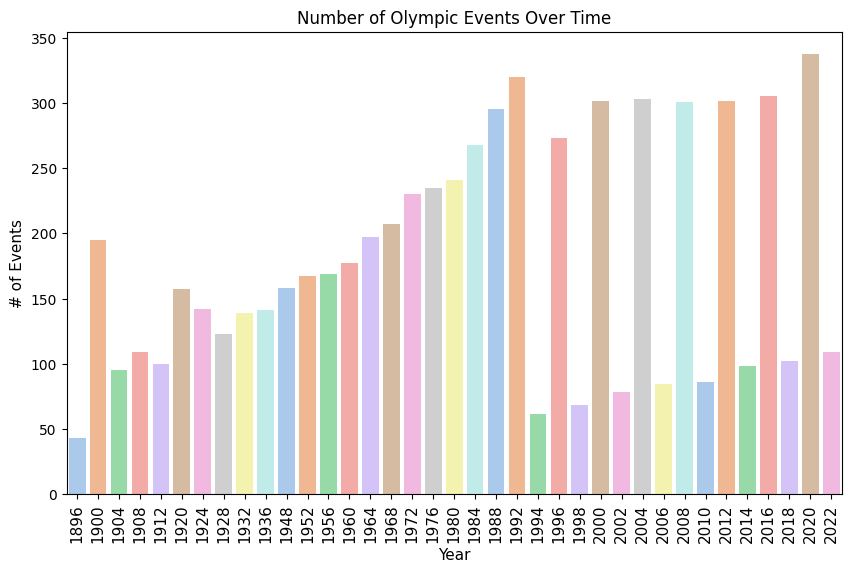

In [255]:
events_time = events_df.groupby('year').size()

plt.figure(figsize=(10,6))
sns.barplot(x=events_time.index, y=events_time.values, palette='pastel')
plt.xticks(rotation=90, fontsize=11)
plt.title('Number of Olympic Events Over Time')
plt.ylabel('# of Events', fontsize=11)
plt.xlabel('Year', fontsize=11)

Until 1994, the Summer and Winter Olympic Games were played in the same year. In 1994, the Winter Games and the Summer games have alternated every two years.

There are significantly less events in the Winter games (~ 100) compared to the Summer Games (~ 300)

#### Event Heatmap

In [184]:
hosts = pd.read_csv('olympic_hosts.csv')
medals = pd.read_csv('olympic_medals.csv')

In [187]:
combined_df = medals.merge(hosts, how='left', left_on='slug_game', right_on='game_slug')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21697 entries, 0 to 21696
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20195 non-null  object
 11  country_3_letter_code  21697 non-null  object
 12  game_slug              21697 non-null  object
 13  game_end_date          21697 non-null  object
 14  game_start_date        21697 non-null  object
 15  game_location      

In [247]:
def get_events(df, season):
    df = df[df['game_season'] == season].reset_index(drop=True).copy()
    disciplines_year_df = df.groupby(['discipline_title', 'game_year'])['participant_type'].count().reset_index()
    heatmap_df = disciplines_year_df.pivot('discipline_title', 'game_year', 'participant_type')
    heatmap_df[heatmap_df > 0] = 1
    column_list = list(heatmap_df.columns)
    column_last = column_list[-1]

    current_disciplines = heatmap_df[heatmap_df[column_last] == 1].sort_values(column_list)
    not_current_disciplines = heatmap_df[heatmap_df[column_last] != 1].sort_values(column_list)
    heatmap_df = pd.concat([current_disciplines, not_current_disciplines])
    heatmap_df.columns = [str(col)[:-2]+'\n'+str(col)[-2:] for col in column_list]
    heatmap_df.index = [index.replace(' ', '\n', 1) for index in heatmap_df.index]
    return heatmap_df

def plot_events(data, title, size=(16,16)):
    plt.figure(figsize=size)
    axes = sns.heatmap(data, annot=False, cbar=False, linewidths=0.8, linecolor='black', square=True, cmap='autumn')
    axes.tick_params(axis='x', labelsize=14)
    axes.tick_params(axis='y', labelsize=12)
    axes.set_ylabel('')
    axes.set_xlabel('')
    axes.xaxis.tick_top()
    axes.xaxis.set_ticks_position('none')
    axes.yaxis.set_ticks_position('none') 
    axes.spines[['bottom', 'right']].set_visible(True)
    axes.set_title(f'{title} Olympic Games', size=22)
    plt.tight_layout()

    plt.show()

C:\Users\Matthew\AppData\Local\Temp\ipykernel_19184\2360424721.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_df = disciplines_year_df.pivot('discipline_title', 'game_year', 'participant_type')


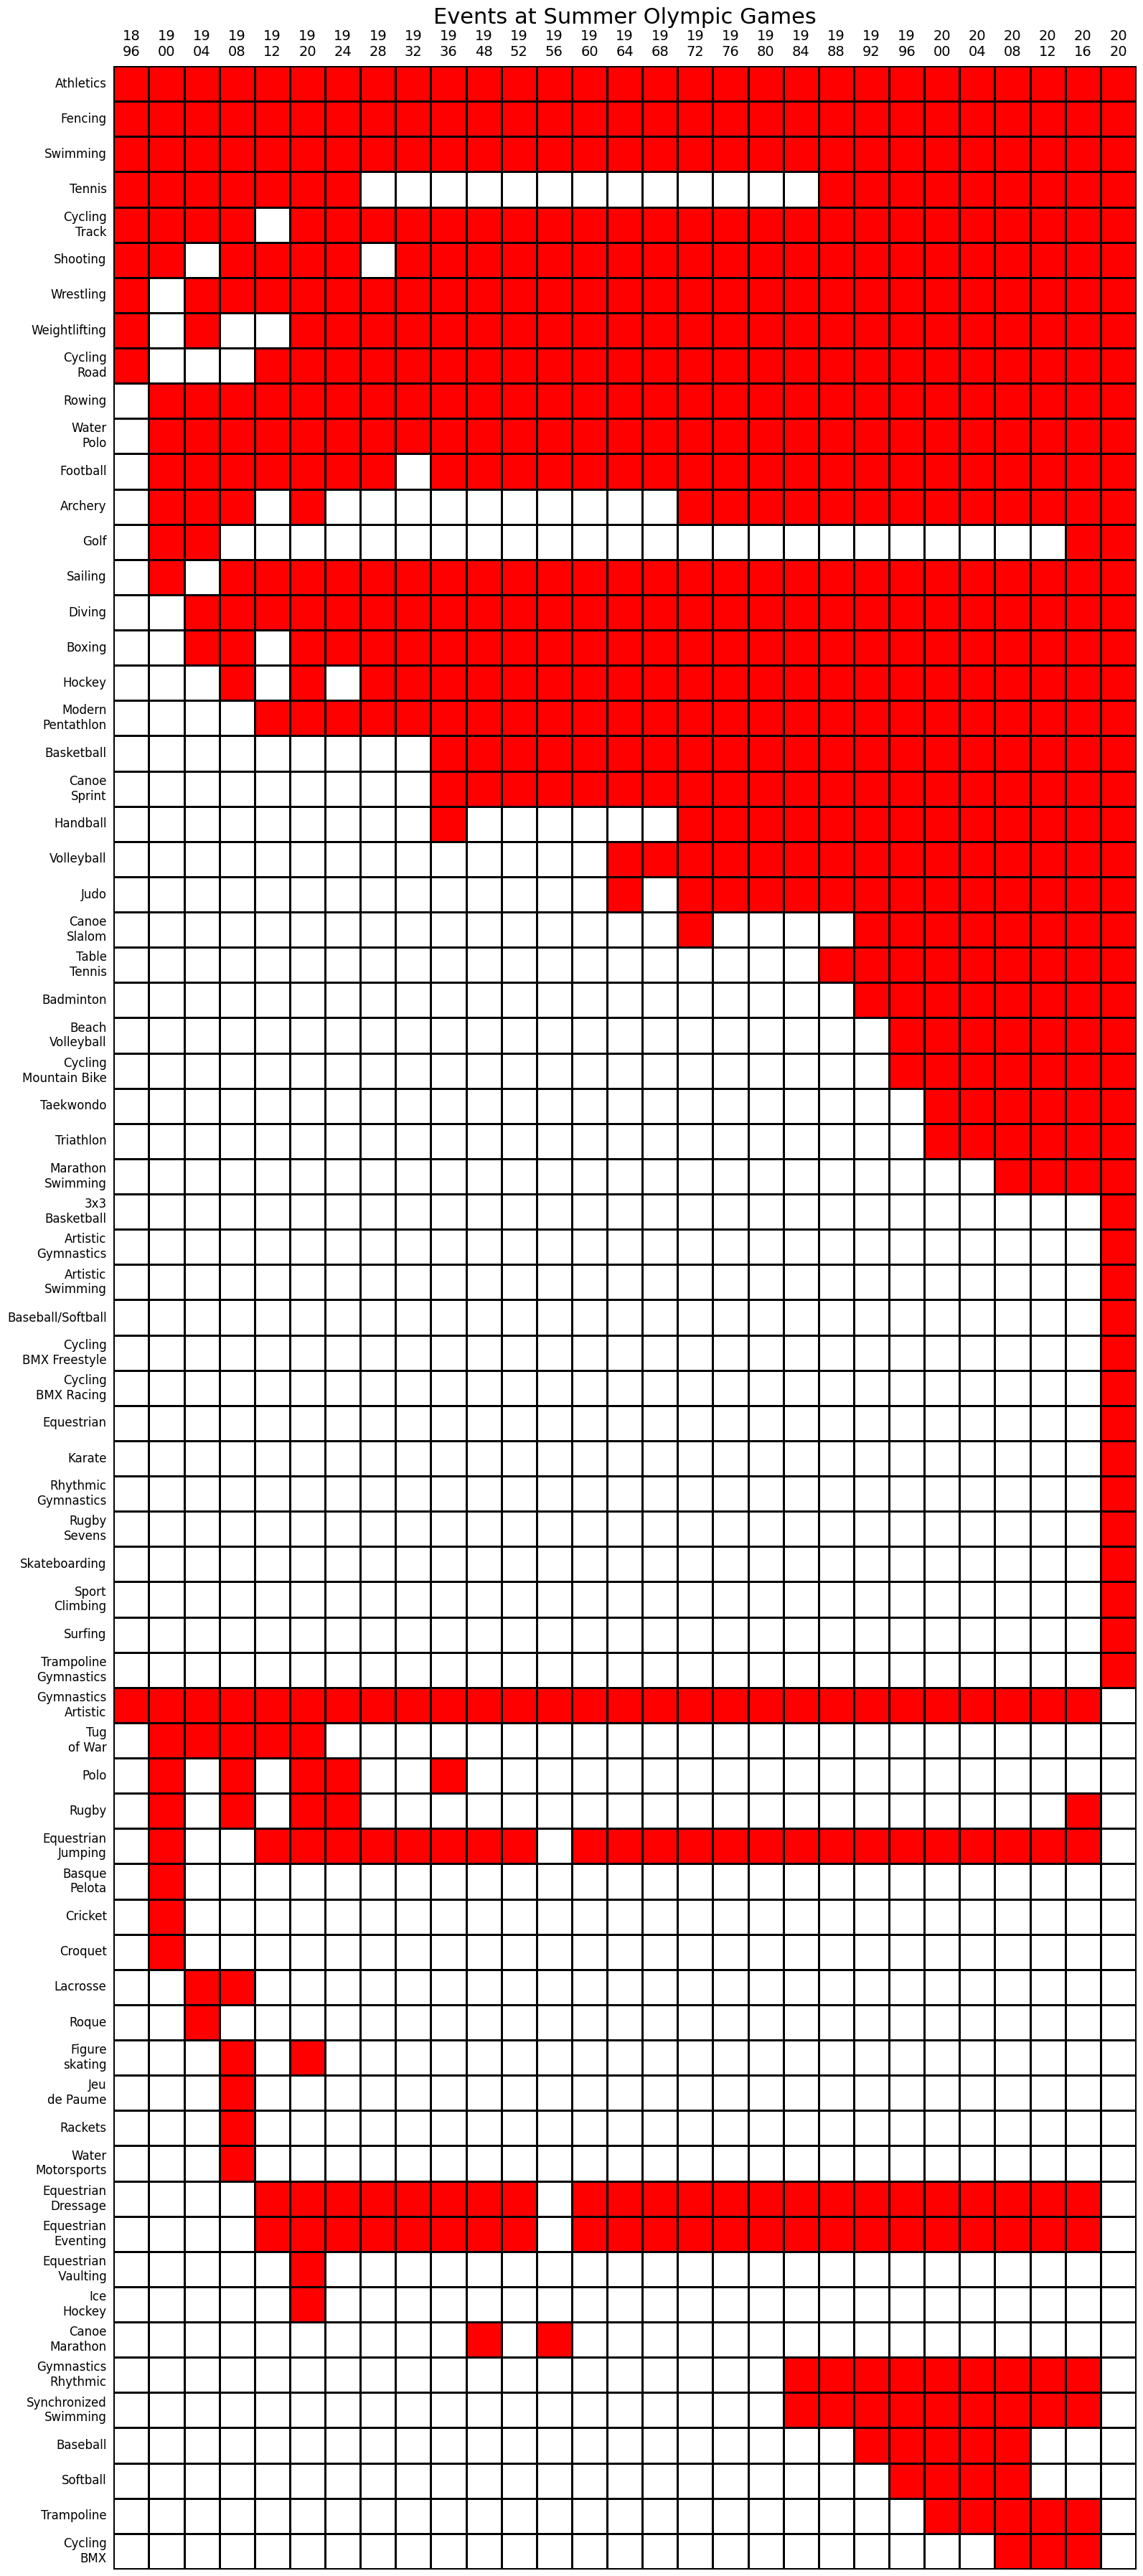

In [248]:
events = get_events(combined_df, 'Summer')
plot_events(events, title="Events at Summer", size=(16,36))

## Most prevalent events

In [8]:
# occurances of each event
occurances = events_df['discipline_title'].value_counts()
occurances.head(20)

Athletics               1061
Swimming                 586
Wrestling                428
Gymnastics Artistic      368
Shooting                 286
Rowing                   267
Boxing                   265
Weightlifting            227
Fencing                  223
Speed skating            205
Sailing                  197
Canoe Sprint             189
Cycling Track            185
Cross Country Skiing     183
Alpine Skiing            170
Judo                     159
Diving                   129
Biathlon                  96
Figure skating            95
Archery                   83
Name: discipline_title, dtype: int64

### "Athletics" sport exploration
Athletics events include running, jumping, throwing, and walking.

25 most common athletics events

In [9]:
events_df['event_title'][events_df['discipline_title'] == 'Athletics'].value_counts().head(25)

triple jump men           28
high jump men             28
long jump men             28
110m hurdles men          28
400m men                  28
marathon men              28
shot put men              28
discus throw men          28
1500m men                 28
pole vault men            28
100m men                  28
800m men                  28
200m men                  27
hammer throw men          27
400m hurdles men          26
3000m steeplechase men    25
javelin throw men         25
10000m men                24
4x400m relay men          24
4x100m relay men          24
5000m men                 24
decathlon men             24
high jump women           21
100m women                21
discus throw women        21
Name: event_title, dtype: int64

In [10]:
# 1. Have any countries consistently dominated overall and in specific sports?
overall_results = df[['discipline_title', 'event_title', 'country_name', 'country_3_letter_code', 'medal_type', 'rank_position', 'participant_type']]
overall_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   discipline_title       162804 non-null  object
 1   event_title            162804 non-null  object
 2   country_name           162804 non-null  object
 3   country_3_letter_code  162804 non-null  object
 4   medal_type             20206 non-null   object
 5   rank_position          158926 non-null  object
 6   participant_type       162804 non-null  object
dtypes: object(7)
memory usage: 8.7+ MB


In [11]:
# medals per country
medals_per_country = overall_results.groupby(['country_name', 'medal_type']).size().unstack(fill_value=0)
medals_per_country['Total Medals'] = medals_per_country.sum(axis=1)
medals_per_country = medals_per_country.sort_values(by='Total Medals', ascending=False)
print(medals_per_country.info())
medals_per_country

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, United States of America to Netherlands Antilles
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BRONZE        156 non-null    int64
 1   GOLD          156 non-null    int64
 2   SILVER        156 non-null    int64
 3   Total Medals  156 non-null    int64
dtypes: int64(4)
memory usage: 6.1+ KB
None


medal_type,BRONZE,GOLD,SILVER,Total Medals
country_name,,,,
United States of America,832,1171,954,2957
Soviet Union,355,473,376,1204
Germany,347,337,361,1045
Great Britain,329,294,322,945
France,330,261,289,880
...,...,...,...,...
Togo,1,0,0,1
The Former Yugoslav Republic of Macedonia,1,0,0,1
Djibouti,1,0,0,1


### Countries with Most Overall Medals

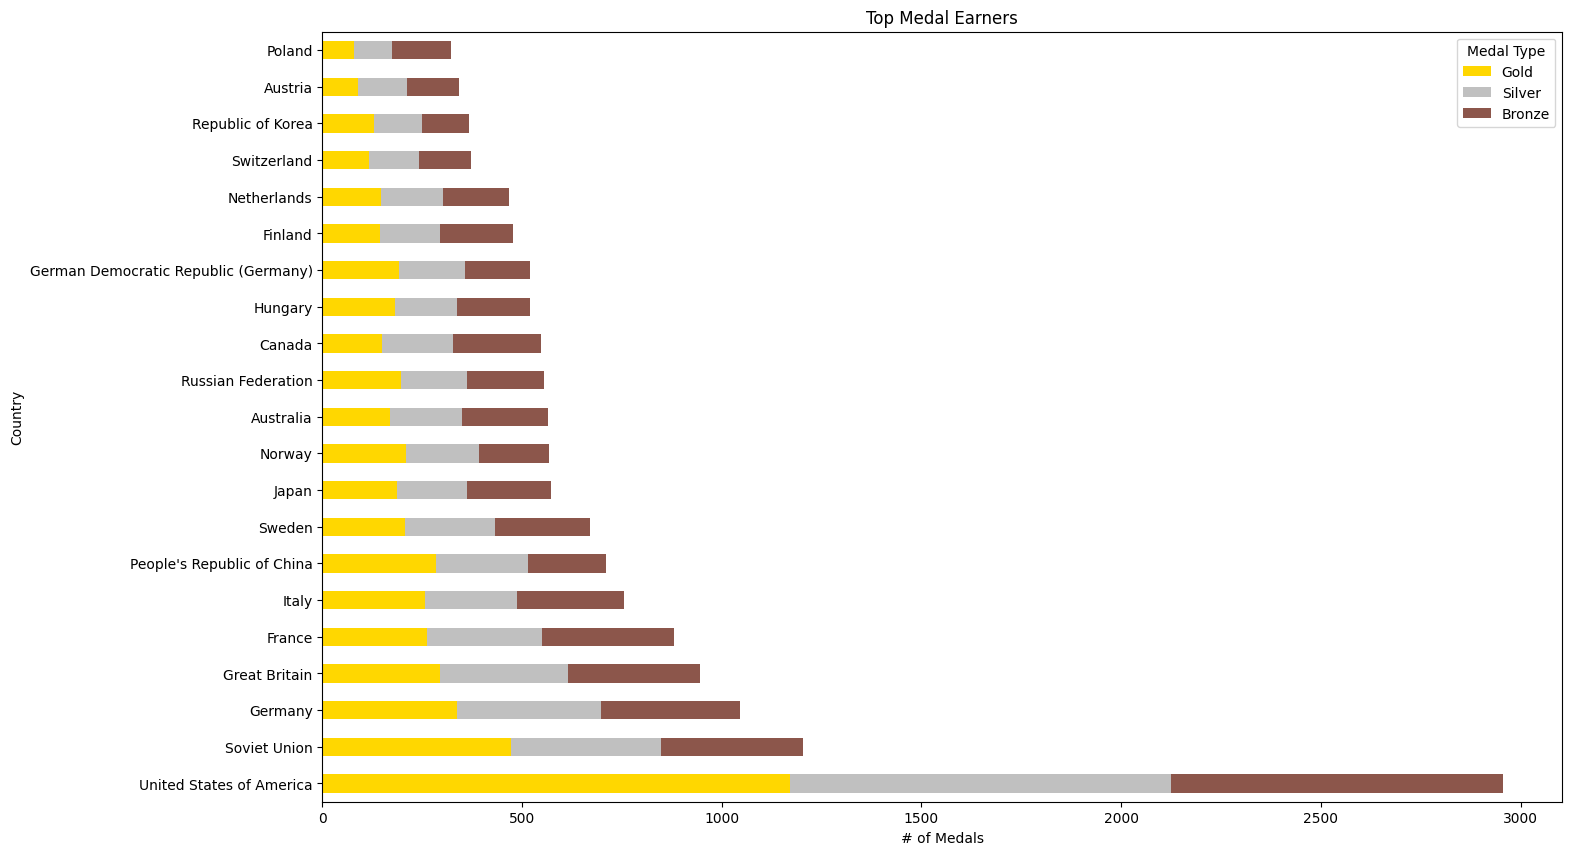

In [12]:
# Countries that have earned the most overall medals
total_medals = medals_per_country[['GOLD', 'SILVER', 'BRONZE']]
total_medals[:21].plot(kind='barh', stacked=True, figsize=(16,10), color=['gold', 'silver', 'tab:brown'])
plt.title('Top Medal Earners')
plt.xlabel('# of Medals')
plt.ylabel('Country')
plt.legend(['Gold', 'Silver', 'Bronze'],title='Medal Type')
plt.show()

### Average Placement for Countries that Earn the Most Medals

In [13]:
# Average placement
avg_placement = overall_results[['discipline_title', 'country_3_letter_code', 'rank_position']]
avg_placement['rank_position'] = pd.to_numeric(avg_placement['rank_position'], errors='coerce', downcast='integer')
avg_placement = avg_placement.dropna()

C:\Users\Matthew\AppData\Local\Temp\ipykernel_19184\3625425123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_placement['rank_position'] = pd.to_numeric(avg_placement['rank_position'], errors='coerce', downcast='integer')


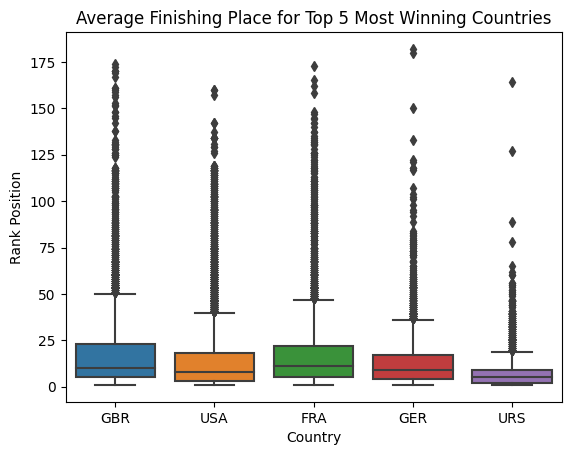

In [14]:
most_winning_countries = ['USA', 'URS', 'GER', 'GBR', 'FRA']

avg_placement_filtered = avg_placement[avg_placement['country_3_letter_code'].isin(most_winning_countries)]

sns.boxplot(data=avg_placement_filtered, y='rank_position', x='country_3_letter_code')
plt.title('Average Finishing Place for Top 5 Most Winning Countries')
plt.xlabel('Country')
plt.ylabel('Rank Position')

plt.show()

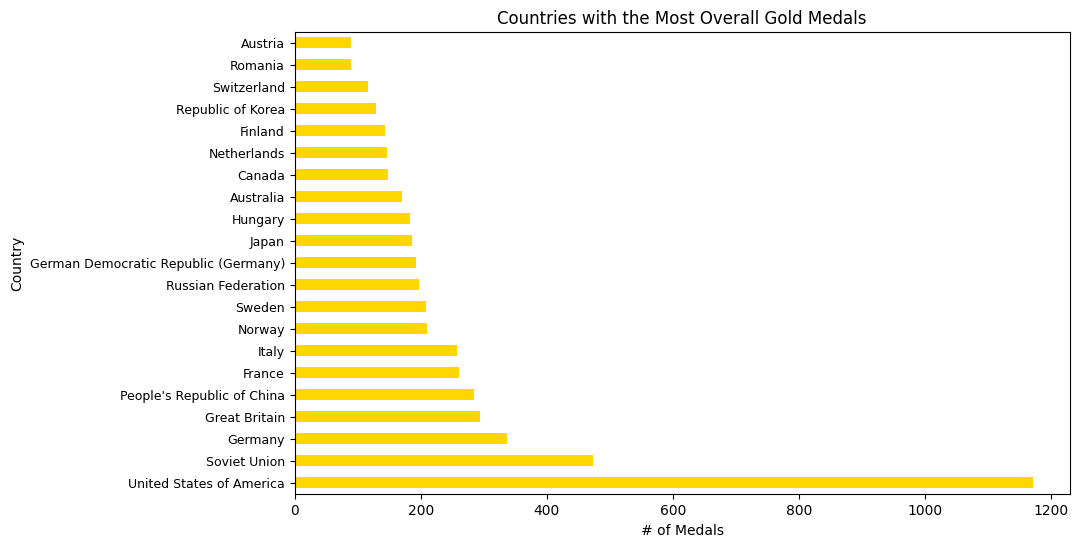

In [15]:
# Countries that have earned the most gold medals
gold_medals = medals_per_country['GOLD'].sort_values(ascending=False)

gold_medals[:21].plot(kind='barh', stacked=True, figsize=(10,6), color='gold')
plt.title("Countries with the Most Overall Gold Medals")
plt.ylabel("Country")
plt.yticks(fontsize=9)
plt.xlabel("# of Medals")
plt.show()

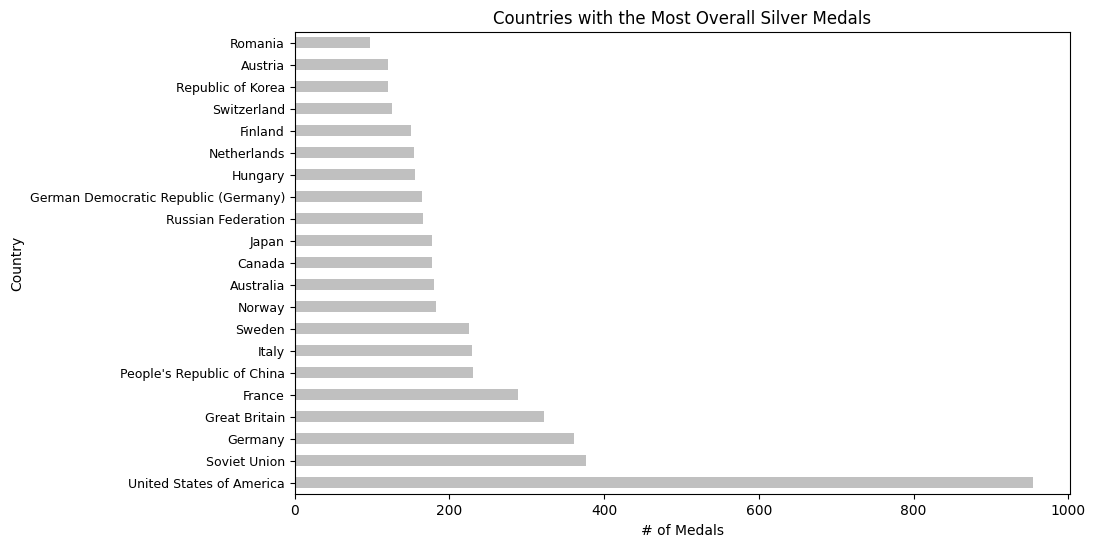

In [16]:
# Countries that have earned the most silver medals
silver_medals = medals_per_country['SILVER'].sort_values(ascending=False)

silver_medals[:21].plot(kind='barh', stacked=True, figsize=(10,6), color='silver')
plt.title("Countries with the Most Overall Silver Medals")
plt.ylabel("Country")
plt.yticks(fontsize=9)
plt.xlabel("# of Medals")
plt.show()

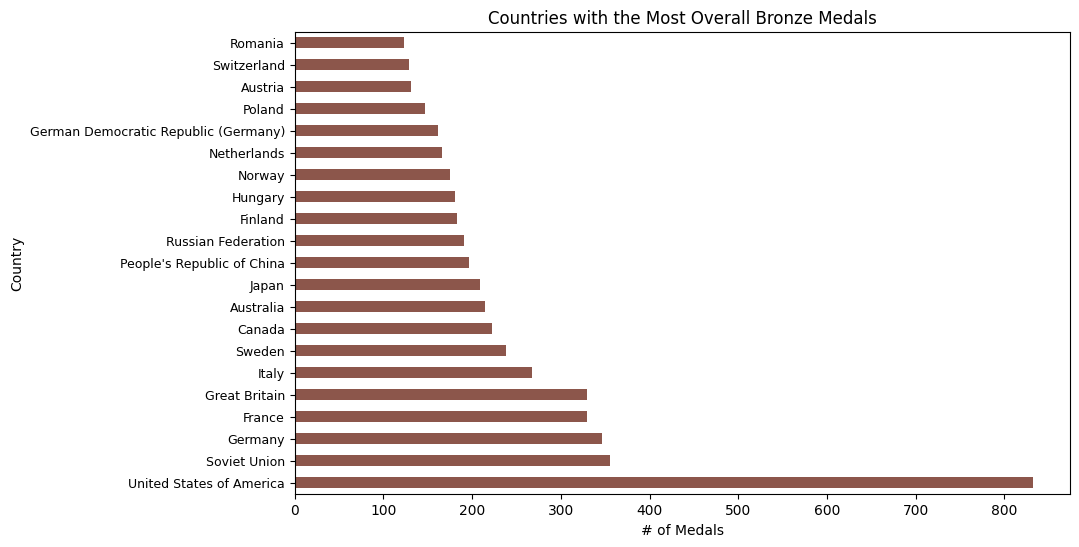

In [17]:
# Countries that have earned the most bronze medals
bronze_medals = medals_per_country['BRONZE'].sort_values(ascending=False)

bronze_medals[:21].plot(kind='barh', stacked=True, figsize=(10,6), color='tab:brown')
plt.title("Countries with the Most Overall Bronze Medals")
plt.ylabel("Country")
plt.yticks(fontsize=9)
plt.xlabel("# of Medals")
plt.show()

#### Top Medal Earners in the Most Popular Sports

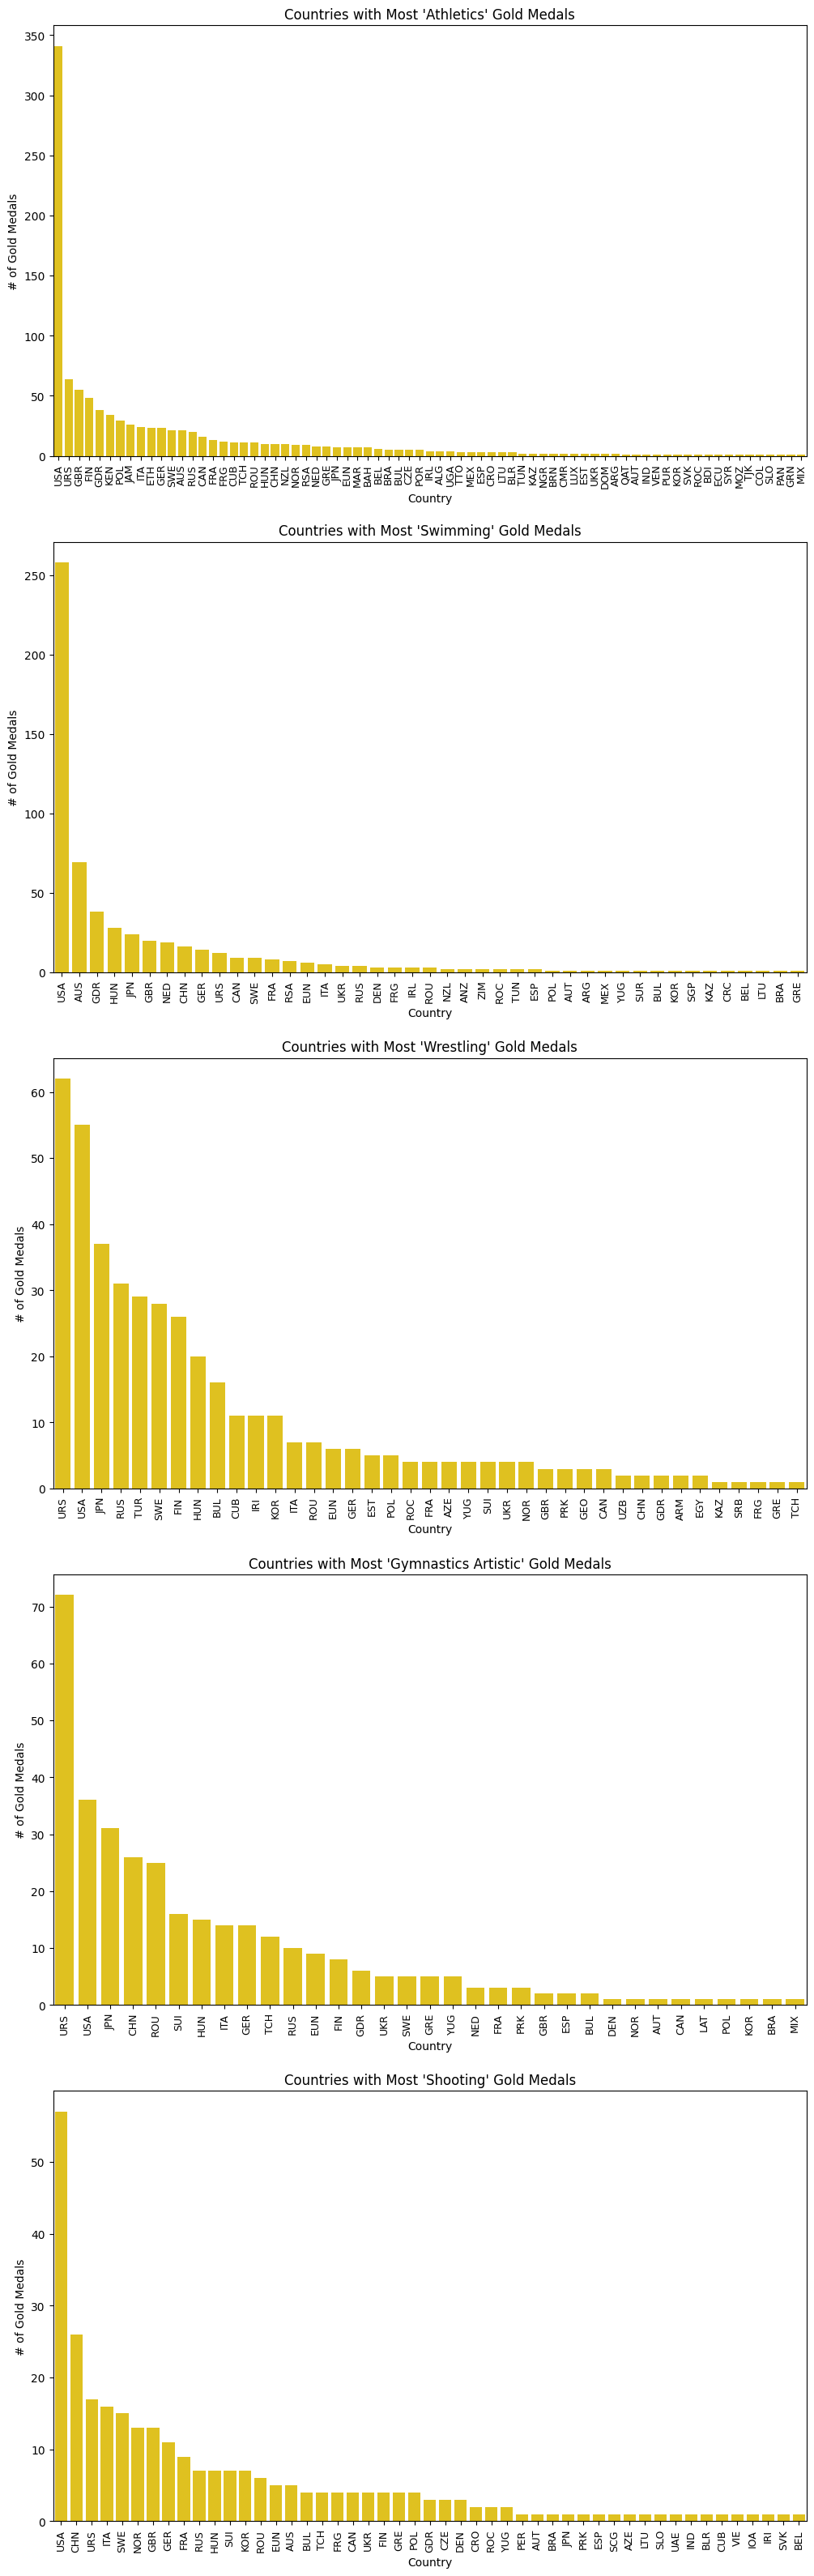

In [18]:
top_sports = ['Athletics', 'Swimming', 'Wrestling', 'Gymnastics Artistic', 'Shooting']

fig, axes = plt.subplots(nrows=len(top_sports), ncols=1, figsize=(12,8*len(top_sports)))

for i, sport in enumerate(top_sports):
    sport_df = df[(df['discipline_title'] == sport) & (df['medal_type'] == 'GOLD')]

    sns.countplot(data=sport_df, x='country_3_letter_code', order=sport_df['country_3_letter_code'].value_counts().index, ax=axes[i], color='gold')
    axes[i].set_title(f"Countries with Most '{sport}' Gold Medals")
    axes[i].set_xlabel('Country')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, fontsize=9)
    axes[i].set_ylabel('# of Gold Medals')

plt.show()

## Are countries better at team vs solo sports?

In [19]:
df['participant_type'].unique()

array(['GameTeam', 'Athlete'], dtype=object)

In [20]:
team_event_df = overall_results[overall_results['participant_type'] == 'GameTeam']
solo_event_df = overall_results[overall_results['participant_type'] == 'Athlete']

In [21]:
# Average Rank Position per event type
team_event_df['rank_position'] = pd.to_numeric(team_event_df['rank_position'], errors='coerce', downcast='integer')
solo_event_df['rank_position'] = pd.to_numeric(solo_event_df['rank_position'], errors='coerce', downcast='integer')

C:\Users\Matthew\AppData\Local\Temp\ipykernel_19184\899147976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_event_df['rank_position'] = pd.to_numeric(team_event_df['rank_position'], errors='coerce', downcast='integer')
C:\Users\Matthew\AppData\Local\Temp\ipykernel_19184\899147976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solo_event_df['rank_position'] = pd.to_numeric(solo_event_df['rank_position'], errors='coerce', downcast='integer')


### Average Placement by Country by Team/Solo Event

In [22]:
avg_placement_team = pd.DataFrame(team_event_df.groupby('country_name')['rank_position'].mean().sort_values(ascending=True))
avg_placement_team

,rank_position
country_name,
Australasia,2.000000
MIX,2.465116
Haiti,3.000000
German Democratic Republic (Germany),3.776316
Soviet Union,3.790588
...,...
American Samoa,27.000000
Sri Lanka,27.000000
Malawi,28.000000


In [23]:
avg_placement_solo = pd.DataFrame(solo_event_df.groupby('country_name')['rank_position'].mean().sort_values(ascending=True))
avg_placement_solo

,rank_position
country_name,
Australasia,4.785714
Saint Kitts and Nevis,6.333333
"Virgin Islands, British",8.000000
Soviet Union,8.421592
German Democratic Republic (Germany),8.438611
...,...
South Sudan,81.000000
Saar,123.714286
Mauritania,NaN


In [24]:
better_than = pd.merge(avg_placement_solo, avg_placement_team, on='country_name', suffixes=('_solo', '_team'))
better_than.head()

,rank_position_solo,rank_position_team
country_name,,
Australasia,4.785714,2.000000
Soviet Union,8.421592,3.790588
German Democratic Republic (Germany),8.438611,3.776316
Côte d'Ivoire,10.000000,7.000000
West Indies Federation,10.600000,16.500000


In [25]:
better_than['which'] = 'Equal'
better_than.loc[better_than['rank_position_solo'] < better_than['rank_position_team'], 'which'] = 'Solo'
better_than.loc[better_than['rank_position_solo'] > better_than['rank_position_team'], 'which'] = 'Team'

In [26]:
better_than.head(10)

,rank_position_solo,rank_position_team,which
country_name,,,
Australasia,4.785714,2.000000,Team
Soviet Union,8.421592,3.790588,Team
German Democratic Republic (Germany),8.438611,3.776316,Team
Côte d'Ivoire,10.000000,7.000000,Team
West Indies Federation,10.600000,16.500000,Solo
Unified Team,11.535980,6.554054,Team
Rhodesia,12.200000,4.000000,Team
Jamaica,12.426923,11.728814,Team
Ethiopia,12.638614,24.000000,Solo


Based on the average ranking for solo and team events, we can which of the two each country is better at. Keeping in mind that there are typically less teams in team events and more competitors in solo events, skewing this metric towards the 'Team' performance being better.

Text(0.5, 1.0, 'Average Performance in Solo vs. Team Events')

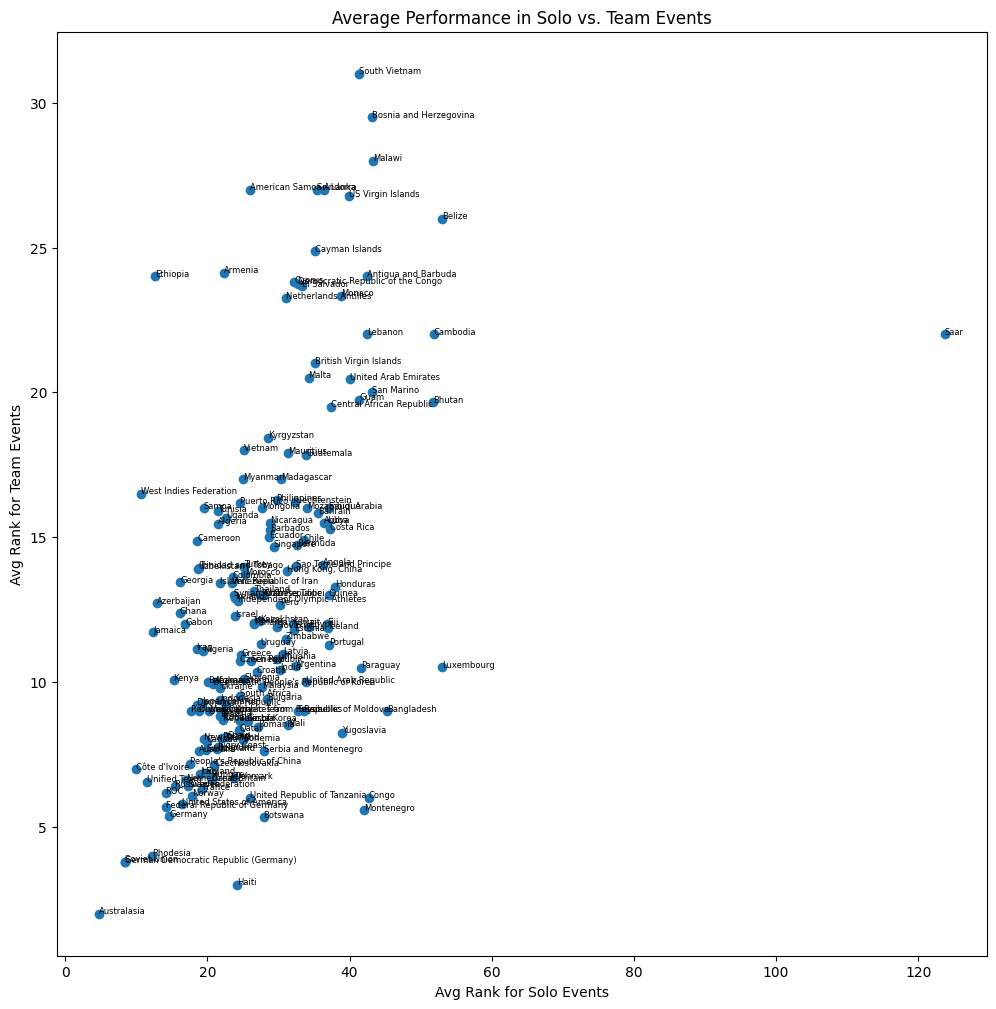

In [27]:
plt.figure(figsize=(12,12))
plt.scatter(better_than['rank_position_solo'], better_than['rank_position_team'])

for i, txt in enumerate(better_than.index):
    plt.annotate(txt, (better_than['rank_position_solo'][i], better_than['rank_position_team'][i]), fontsize=6)

plt.xlabel('Avg Rank for Solo Events')

plt.ylabel('Avg Rank for Team Events')
plt.title('Average Performance in Solo vs. Team Events')

## Which athletes have won the most medals?

In [28]:
medals_df = pd.read_csv('olympic_medals.csv')
medals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20195 non-null  object
 11  country_3_letter_code  21697 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [29]:
medals_df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [30]:
athlete_gold = medals_df[medals_df['medal_type'] == 'GOLD']['athlete_full_name'].value_counts()[:20]
athlete_silver = medals_df[medals_df['medal_type'] == 'SILVER']['athlete_full_name'].value_counts()[:20]
athlete_bronze = medals_df[medals_df['medal_type'] == 'BRONZE']['athlete_full_name'].value_counts()[:20]

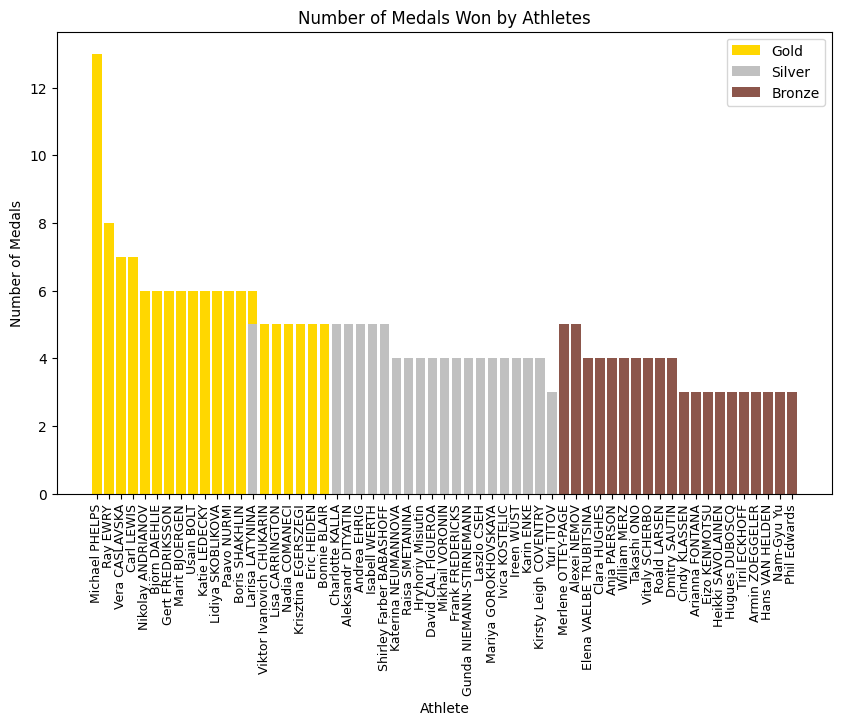

In [39]:
# Plotting the number of gold, silver, and bronze medals won by athletes
plt.figure(figsize=(10, 6))
plt.bar(athlete_gold.index, athlete_gold.values, color='gold', label='Gold')
plt.bar(athlete_silver.index, athlete_silver.values, color='silver', label='Silver')
plt.bar(athlete_bronze.index, athlete_bronze.values, color='tab:brown', label='Bronze')

plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Won by Athletes')
plt.xticks(rotation=90, fontsize=9)
plt.legend()

plt.show()

## Is there host country advantage?

In [42]:
df['slug_game'].unique()

array(['beijing-2022', 'tokyo-2020', 'pyeongchang-2018', 'rio-2016',
       'sochi-2014', 'london-2012', 'vancouver-2010', 'beijing-2008',
       'turin-2006', 'athens-2004', 'salt-lake-city-2002', 'sydney-2000',
       'nagano-1998', 'atlanta-1996', 'lillehammer-1994',
       'barcelona-1992', 'albertville-1992', 'seoul-1988', 'calgary-1988',
       'los-angeles-1984', 'sarajevo-1984', 'moscow-1980',
       'lake-placid-1980', 'montreal-1976', 'innsbruck-1976',
       'munich-1972', 'sapporo-1972', 'mexico-city-1968', 'grenoble-1968',
       'tokyo-1964', 'innsbruck-1964', 'rome-1960', 'squaw-valley-1960',
       'melbourne-1956', 'cortina-d-ampezzo-1956', 'helsinki-1952',
       'oslo-1952', 'london-1948', 'st-moritz-1948', 'berlin-1936',
       'garmisch-partenkirchen-1936', 'los-angeles-1932',
       'lake-placid-1932', 'amsterdam-1928', 'st-moritz-1928',
       'paris-1924', 'chamonix-1924', 'antwerp-1920', 'stockholm-1912',
       'london-1908', 'st-louis-1904', 'paris-1900', 'at

In [46]:
host_country_mapping = {
    'beijing-2022': "China",
    'tokyo-2020': 'Japan',
    'pyeongchang-2018': 'South Korea',
    'rio-2016': 'Brazil',
    'sochi-2014': 'Russia', 
    'london-2012': 'England', 
    'vancouver-2010': 'Canada', 
    'beijing-2008': 'China',
    'turin-2006': 'Italy', 
    'athens-2004': 'Greece', 
    'salt-lake-city-2002': 'United States', 
    'sydney-2000': 'Australia',
    'nagano-1998': 'Japan', 
    'atlanta-1996': 'United States', 
    'lillehammer-1994': 'Norway',
    'barcelona-1992': 'Spain', 
    'albertville-1992': 'France', 
    'seoul-1988': 'South Korea', 
    'calgary-1988': 'Canada',
    'los-angeles-1984': 'United States', 
    'sarajevo-1984': 'Bosnia and Herzegovina', 
    'moscow-1980': 'Russia',
    'lake-placid-1980': 'United States', 
    'montreal-1976': 'Canada', 
    'innsbruck-1976': 'Austria',
    'munich-1972': 'Germany', 
    'sapporo-1972': 'Japan', 
    'mexico-city-1968': 'Mexico', 
    'grenoble-1968': 'France',
    'tokyo-1964': 'Japan', 
    'innsbruck-1964': 'Austria', 
    'rome-1960': 'Italy', 
    'squaw-valley-1960': 'United States',
    'melbourne-1956': 'Australia', 
    'cortina-d-ampezzo-1956': 'Italy', 
    'helsinki-1952': 'Finland',
    'oslo-1952': 'Norway', 
    'london-1948': 'England', 
    'st-moritz-1948': 'Switzerland', 
    'berlin-1936': 'Germany',
    'garmisch-partenkirchen-1936': 'Germany', 
    'los-angeles-1932': 'United States',
    'lake-placid-1932': 'United States', 
    'amsterdam-1928': 'Netherlands', 
    'st-moritz-1928': 'Switzerland',
    'paris-1924': 'France', 
    'chamonix-1924': 'France', 
    'antwerp-1920': 'Belgium', 
    'stockholm-1912': 'Sweden',
    'london-1908': 'France', 
    'st-louis-1904': 'United States', 
    'paris-1900': 'France', 
    'athens-1896': 'Greece'
}

In [55]:
host_country_df = medals_df[['slug_game', 'medal_type', 'country_name']]
host_country_df.head()
print(host_country_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   slug_game     21697 non-null  object
 1   medal_type    21697 non-null  object
 2   country_name  21697 non-null  object
dtypes: object(3)
memory usage: 508.6+ KB
None


In [57]:
host_country_df['is_host_country'] = host_country_df['slug_game'].map(host_country_mapping)
host_country_df['is_host_country'] = host_country_df['is_host_country'] == host_country_df['country_name']

C:\Users\Matthew\AppData\Local\Temp\ipykernel_19184\160382841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_country_df['is_host_country'] = host_country_df['slug_game'].map(host_country_mapping)
C:\Users\Matthew\AppData\Local\Temp\ipykernel_19184\160382841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_country_df['is_host_country'] = host_country_df['is_host_country'] == host_country_df['country_name']


In [76]:
host_advantage = host_country_df[host_country_df['is_host_country'] == True]
print(host_advantage.info())
host_advantage['slug_game'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 550 to 21696
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   slug_game        944 non-null    object
 1   medal_type       944 non-null    object
 2   country_name     944 non-null    object
 3   is_host_country  944 non-null    bool  
dtypes: bool(1), object(3)
memory usage: 30.4+ KB
None


paris-1900                     103
berlin-1936                     89
sydney-2000                     69
stockholm-1912                  68
tokyo-2020                      60
athens-1896                     49
paris-1924                      43
melbourne-1956                  39
rome-1960                       38
antwerp-1920                    36
vancouver-2010                  29
tokyo-1964                      29
lillehammer-1994                26
barcelona-1992                  26
rio-2016                        23
helsinki-1952                   21
amsterdam-1928                  20
london-1908                     20
athens-2004                     19
oslo-1952                       16
innsbruck-1964                  14
turin-2006                      13
st-moritz-1948                  12
montreal-1976                   11
nagano-1998                     10
albertville-1992                10
grenoble-1968                    9
mexico-city-1968                 9
garmisch-partenkirch

Out of the 21697 total medals given, 944 were given to participants of the host country. 

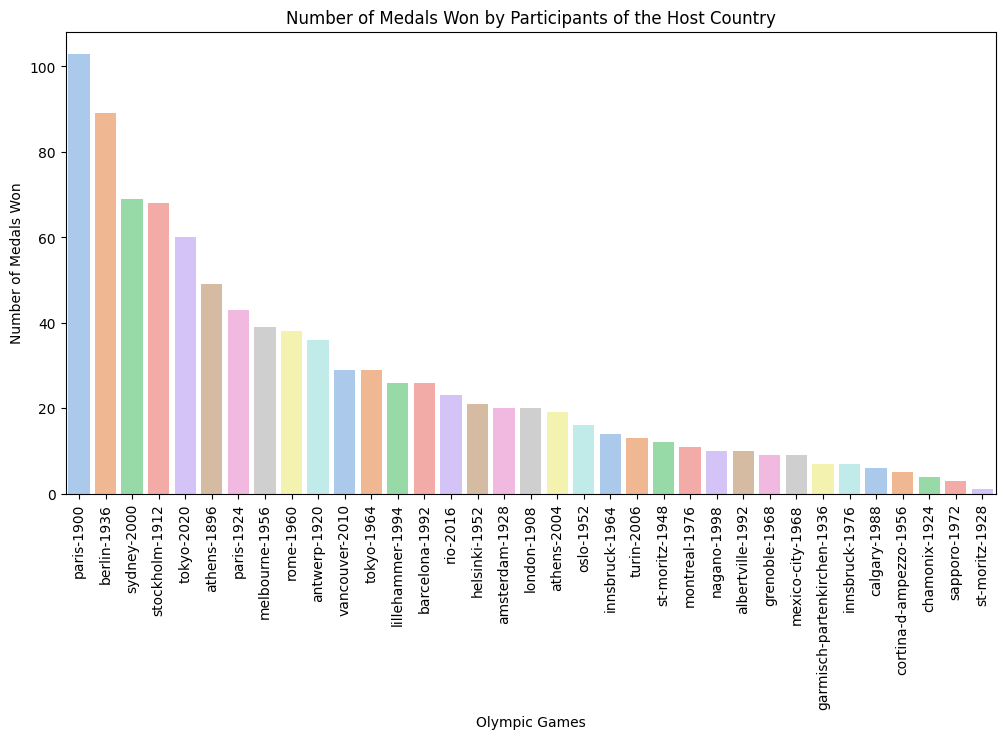

In [75]:
medals_host_country = pd.DataFrame(host_advantage['slug_game'].value_counts())

plt.figure(figsize=(12,6))
sns.barplot(data=medals_host_country, y='slug_game', x=medals_host_country.index, palette='pastel')
plt.title('Number of Medals Won by Participants of the Host Country')
plt.xticks(rotation=90)
plt.xlabel('Olympic Games')
plt.ylabel('Number of Medals Won')
plt.show()

Paris 1900 and Berlin 1936 had participants from France and Germany, respectively, winning significantly more medals than the other Olympic Games.

In [181]:
country_mapping = df[['country_name', 'country_3_letter_code']]
country_mapping.drop_duplicates()

,country_name,country_3_letter_code
0,Italy,ITA
1,Norway,NOR
2,Sweden,SWE
3,Great Britain,GBR
4,Canada,CAN
...,...,...
133964,Saar,SAA
147639,MIX,MIX
155211,Australasia,ANZ
155215,Bohemia,BOH
